# **<center>Random Experiment🎲<center>**

\** that makes no sense to me

This weekend I had nothing much to do and did not knew what to do. So I decided to do some random experiment with weights of simple neural network. I bacsicly trained two NN to classify 3 classes : 0,1 and 2. First model was trained on data containing 0 and 1 class only with just one class of 2.Second model was trained on data containing 0 and 2 class only with just one class of 1. Then I tried to combine the weights to improve the performce of the model .

## Imports

In [53]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
keras.utils.set_random_seed(69)

## Data Preparation

In [54]:
data=pd.read_csv('Data_sets_generated/Random_Exp_Data.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,C_0,C_1,C_2,C_3,target
0,-1.172354,-0.533254,-1.284619,1.452159,0
1,-2.051463,-1.496670,1.824016,-1.881343,0
2,-2.908707,-1.720212,0.605944,-1.197363,2
3,-1.799285,-1.060268,-0.667529,1.139232,0
4,-1.673138,-0.553859,-0.621898,-1.239415,2


In [55]:
x_train, x_test, y_train, y_test= train_test_split(data.loc[:,['C_0','C_1','C_2','C_3']], data.loc[:,'target'], test_size= 0.25, random_state=69)

In [56]:
x_train_0and1=x_train[y_train != 2]
y_train_0and1=y_train[y_train != 2]
x_train_0and2=x_train[y_train != 1]
y_train_0and2=y_train[y_train != 1]

In [57]:
x_train_0and1.loc[len(x_train_0and1)]=x_train_0and2.iloc[2]
y_train_0and1.loc[len(y_train_0and1)]=y_train_0and2.iloc[2]
x_train_0and2.loc[len(x_train_0and2)]=x_train_0and1.iloc[-1]
y_train_0and2.loc[len(y_train_0and2)]=y_train_0and1.iloc[-1]

C:\Users\Prasann\AppData\Local\Temp\ipykernel_59832\1836519438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_0and1.loc[len(x_train_0and1)]=x_train_0and2.iloc[2]
C:\Users\Prasann\AppData\Local\Temp\ipykernel_59832\1836519438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_0and2.loc[len(x_train_0and2)]=x_train_0and1.iloc[-1]


In [58]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train_0and1.to_numpy().reshape(-1, 1))
y_train_0and1=enc.transform(y_train_0and1.to_numpy().reshape(-1, 1))
y_train_0and2=enc.transform(y_train_0and2.to_numpy().reshape(-1, 1))
y_test=enc.transform(y_test.to_numpy().reshape(-1, 1))

## Model on 0 and 1 class

In [59]:
model_0and1 = Sequential()
model_0and1.add(Dense(3, input_dim = 4, activation = 'relu'))
model_0and1.add(Dense(3, activation = 'relu'))
model_0and1.add(Dense(3, activation = 'softmax'))

In [60]:
model_0and1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_0and1.fit(x_train_0and1, y_train_0and1.toarray(), epochs = 15, batch_size = 5, verbose = 0)
scores = model_0and1.evaluate(x_test, y_test.toarray())

8/8 [==============================] - 0s 2ms/step - loss: 2.3204 - accuracy: 0.6000


In [61]:
weights_0and1 = np.array(model_0and1.get_weights(),dtype=object)
weights_0and1

array([array([[-1.2648245 ,  0.96862406,  0.7891192 ],
              [-0.45879212,  0.06792744,  0.03528146],
              [-0.48905635, -0.2145036 ,  0.97643226],
              [-0.2176102 ,  1.1224234 ,  0.5461848 ]], dtype=float32),
       array([0.5627227 , 0.6893555 , 0.14783226], dtype=float32),
       array([[-1.243646  , -0.37428883,  0.9792488 ],
              [ 0.49738213, -0.9002182 ,  0.8834821 ],
              [ 0.6584575 ,  0.2941444 , -1.1756579 ]], dtype=float32),
       array([ 0.3411932 , -0.1709783 ,  0.48799157], dtype=float32),
       array([[-0.74462736,  0.73859406, -0.65093225],
              [ 0.63012826, -0.45401794, -0.52898496],
              [ 0.2715547 , -0.8078408 , -1.6993284 ]], dtype=float32),
       array([-0.01820395,  0.51567423, -0.6662763 ], dtype=float32)],
      dtype=object)

## Model on 0 and 2 class

In [62]:
model_0and2 = Sequential()
model_0and2.add(Dense(3, input_dim = 4, activation = 'relu'))
model_0and2.add(Dense(3, activation = 'relu'))
model_0and2.add(Dense(3, activation = 'softmax'))

In [63]:
model_0and2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_0and2.fit(x_train_0and2, y_train_0and2.toarray(), epochs = 15, batch_size = 5, verbose=0)
scores = model_0and1.evaluate(x_test, y_test.toarray())

8/8 [==============================] - 0s 1ms/step - loss: 2.3204 - accuracy: 0.6000


In [64]:
weights_0and2 = np.array(model_0and2.get_weights(),dtype=object)
weights_0and2

array([array([[ 0.5140788 , -1.0727717 , -0.71647   ],
              [ 0.25476843, -0.88018405, -1.5424502 ],
              [-0.5071888 , -0.3732093 ,  1.0565449 ],
              [-0.12627293,  1.9299017 , -0.49468356]], dtype=float32),
       array([-0.13807662,  0.4173649 ,  0.15028737], dtype=float32),
       array([[-0.06541228, -0.8268094 , -0.7720883 ],
              [ 0.8702223 , -0.9294152 , -0.03867984],
              [ 0.55098426, -0.5504384 , -0.33163595]], dtype=float32),
       array([0.12008184, 0.        , 0.        ], dtype=float32),
       array([[ 0.11437606, -1.5427059 , -0.7615882 ],
              [-0.28921485,  0.288723  ,  0.30415893],
              [ 0.37598395,  0.5359597 ,  0.78862786]], dtype=float32),
       array([-0.26985583, -0.7827068 ,  0.8470816 ], dtype=float32)],
      dtype=object)

## Combined model

In [65]:
model_combined = Sequential()
model_combined.add(Dense(3, input_dim = 4, activation = 'relu'))
model_combined.add(Dense(3, activation = 'relu'))
model_combined.add(Dense(3, activation = 'softmax'))

model_combined.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Combining Weights :

### $w = \alpha	*w_{0and1} + (1-\alpha	)*w_{0and2}$

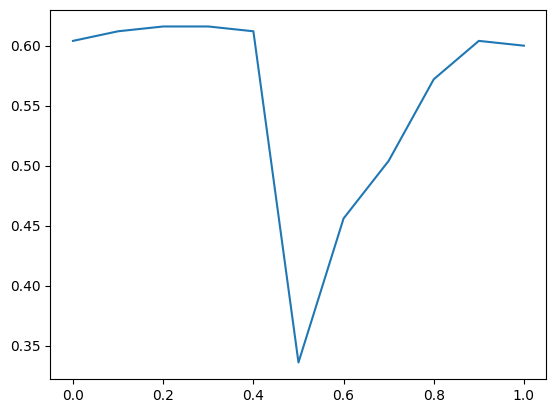

In [66]:
alpha_list=[]
accuracy_list=[]
for i in range(0,11,1):
    alpha=i/10
    weight_combined=[]
    for i in range(len(weights_0and1)):
        weight_combined.append(alpha*weights_0and1[i]+(1-alpha)*weights_0and2[i])
    weight_combined=np.array(weight_combined,dtype=object)
    model_combined.set_weights(weight_combined)
    scores = model_combined.evaluate(x_test, y_test.toarray(), verbose=0)
    alpha_list.append(alpha)
    accuracy_list.append(scores[1])
plt.plot(alpha_list,accuracy_list)

Clearly combining model in such a way was not a good idea as the accuracy droped significantly when alpha=0.5 .

### $w = \alpha	*w^2_{0and1} + (1-\alpha)*w^2_{0and2}$

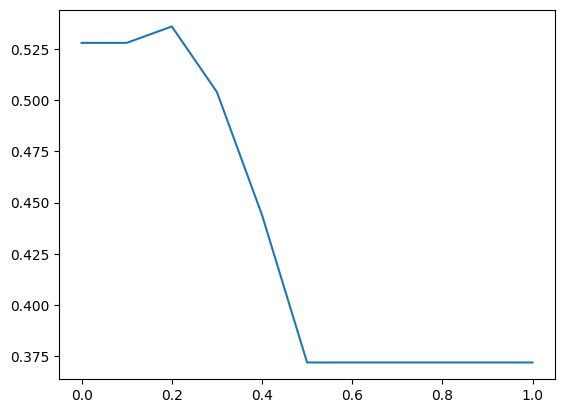

In [67]:
alpha_list=[]
accuracy_list=[]
for i in range(0,11,1):
    alpha=i/10
    weight_combined=[]
    for i in range(len(weights_0and1)):
        weight_combined.append(alpha*weights_0and1[i]**2+(1-alpha)*weights_0and2[i]**2)
    weight_combined=np.array(weight_combined,dtype=object)
    model_combined.set_weights(weight_combined)
    scores = model_combined.evaluate(x_test, y_test.toarray(),verbose=0)
    alpha_list.append(alpha)
    accuracy_list.append(scores[1])
plt.plot(alpha_list,accuracy_list)

Again I got terrible results 🥲.

### $w = \frac{w^n_{0and1} +w^n_{0and2}}{2}$

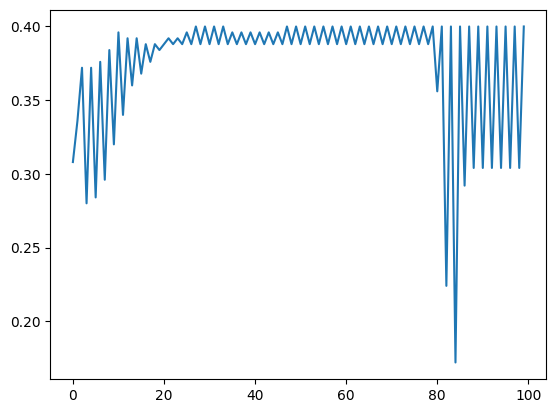

In [68]:
accuracy_list=[]
for n in range(0,100,1):
    weight_combined=[]
    for i in range(len(weights_0and1)):
        weight_combined.append((weights_0and1[i]**n+weights_0and2[i]**n)/2)
    weight_combined=np.array(weight_combined,dtype=object)
    model_combined.set_weights(weight_combined)
    scores = model_combined.evaluate(x_test, y_test.toarray(),verbose=0)
    accuracy_list.append(scores[1])
plt.plot(accuracy_list)

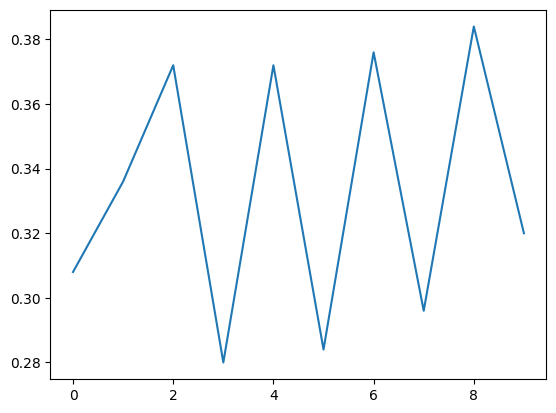

In [69]:
plt.plot(accuracy_list[:10])

Now I got something intresting . These spikes are very much intresting and till now I have not find any reason to explain this . The pattern is that there is a spike in accuracy at **even values of n** and have **higher accuracies** as compared to nearby *odd values of n*.

### I would love to know what is the reason behind this pattern or to know that this is a just a random pattern which I have found.